# HomeWork 6. Denis Khryashchev (dk2926)

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import pylab as pl

#Plotting inside the notebook
%pylab inline

#Setting limits for the number of displayed rows
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 25)

Populating the interactive namespace from numpy and matplotlib


## 0. Reading the MTA turnstile data, cleaning, plotting

In [2]:
#Loading the MTA data
mta_cube = np.load('MTA_Fare.npy')

In [3]:
# Cleaning the data, replacing -1 with NaN values
mta_cube = mta_cube.astype(float)
mta_cube[mta_cube==-1] = np.nan
print mta_cube
#Printing out the size of the data cube
print mta_cube.shape

[[[  5.69610000e+04   6.47030000e+04   6.80020000e+04 ...,   3.65270000e+04
     3.39290000e+04   3.68240000e+04]
  [  1.73200000e+03   2.08300000e+03   2.10700000e+03 ...,   1.26400000e+03
     1.17200000e+03   1.23800000e+03]
  [  2.03000000e+02   2.76000000e+02   2.45000000e+02 ...,   1.86000000e+02
     1.67000000e+02   1.67000000e+02]
  ..., 
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
     0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
     0.00000000e+00   0.00000000e+00]
  [             nan              nan              nan ...,   1.12100000e+03
     1.37700000e+03   7.12000000e+02]]

 [[  1.62100000e+04   2.01790000e+04   2.17690000e+04 ...,              nan
                nan              nan]
  [  5.03000000e+02   6.47000000e+02   6.65000000e+02 ...,              nan
                nan              nan]
  [  4.10000000e+01   4.30000000e+01   4.40000000e+01 ...,              nan
  

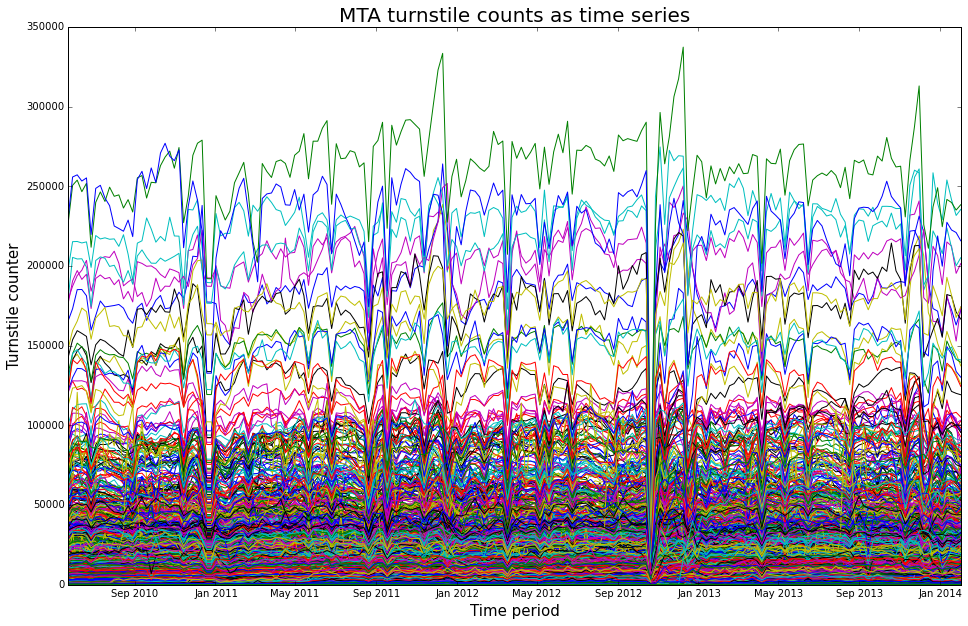

In [4]:
# Generating date indeces for the data cube
start_date = '05/21/2010'
end_date = '02/07/2014'
date_indeces = pd.date_range(start = start_date, end = end_date, freq='W')

# Plotting all the records together as time series of the date indeces
fig = figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.set_title('MTA turnstile counts as time series', size = 20)
ax.set_xlabel('Time period', size = 15)
ax.set_ylabel('Turnstile counter', size = 15)
for k in range(0, 599):
    for v in range(0, 22):
        ax.plot(date_indeces, mta_cube[k,v])

In [5]:
# Aggregating turnstile counts per ticket type
mta_cube_tickets = np.nansum(mta_cube, axis = 0)

# Replacing columns with rows and inserting dates
mta_cube_tickets = pd.DataFrame(np.transpose(mta_cube_tickets))
mta_cube_tickets.index =  pd.Index(date_indeces)

# Assigning names for the tickets 
mta_cube_tickets.columns = ['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez', 'ff','mc',
                            'mr','month','rfm','rr','sen','spec','tcmc','t', 'umlim','xbus','stud']
print mta_cube_tickets

                 10t     14d     1d      2t    30d       7d      ada   afas  \
2010-05-23  11494615  530524  47801  186551  46808  3697443  8551937  10063   
2010-05-30  12526859  583533  51486  199229  64353  3981808  9486394  11847   
2010-06-06  12766627  586194  51636  199668  56994  4033030  9476538  12277   
2010-06-13  12653675  562602  52063  196389  37429  4032753  9450081  11221   
2010-06-20  12809694  548858  51153  194883  35210  3925446  9294002  10515   
2010-06-27  11429783  455691  46852  175648  46849  3663144  8286803  10282   
2010-07-04  12346877  518187  48963  188467  60225  3918104  9271413  11361   
2010-07-11  12576759  513412  49629  188090  47439  4028251  9306575  10950   
2010-07-18  12437115  512192  49030  186822  32084  4030717  9145852  10723   
2010-07-25  12431257  522569  50376  190528  52171  4032340  8906117  10574   
2010-08-01  12401572  518622  48958  188840  54660  4063667  8621043  10826   
2010-08-08  12280641  519691  48619  187663  44183  

### Looking at the plot, one can notice the gap between September, 2012 and January, 2013.

# Task 1. 
## Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series. Identify it and figure out what it is due to.

Events that are outside of 3 sigmas: ['2012-10-20T20:00:00.000000000-0400']


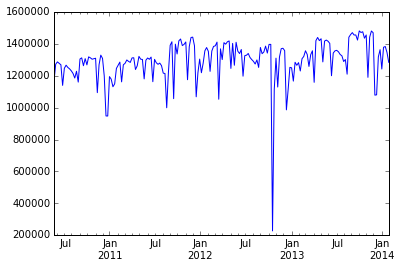

In [6]:
# Calculating mean value and the range of (-3 sigma, +3 sigma ) in order to find the significant drop
# Calculating mean counts for tickets combined
tickets = mta_cube_tickets.mean(axis=1)
mean = tickets.mean()
sigma = tickets.std()
minus_3_sigma = mean - 3*sigma
plus_3_sigma = mean + 3*sigma
# Selecting data that is outside 
event = tickets[(tickets[0:] > plus_3_sigma) | (tickets [0:] < minus_3_sigma) ]
# Plotting the time series for visuals 
plot2 = tickets.plot()
print "Events that are outside of 3 sigmas: %s"%event.index.values

### The only event in the data that is outside of 3 sigmas is ['2012-10-20T20:00:00.000000000-0400'], the event that happened on October, 20, 2012 at 8 p.m. The event is Hurricane Sandy.

# Task 2. 
## Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

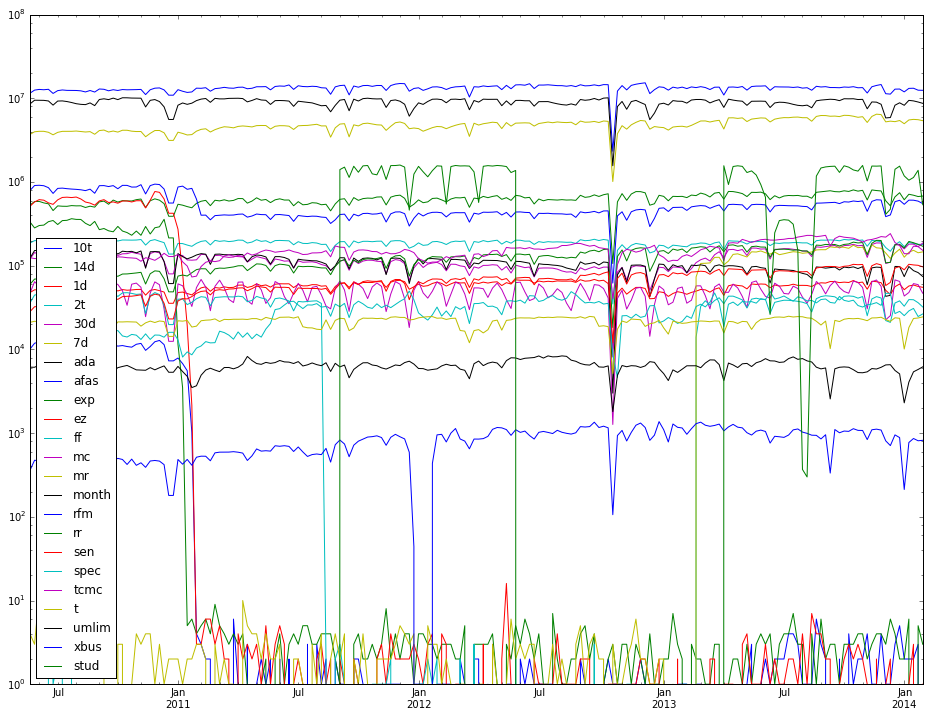

In [7]:
#Plotting the turnstile count by ticket type for visuals
plot3 = mta_cube_tickets.plot(figsize = (16, 12), logy= True)

In [8]:
# Calculating ration of the usage of the first 10 weeks and the last 10 weeks
print len(mta_cube_tickets)
# Calculating mean weighted tickets
weighted_tickets = mta_cube_tickets / mta_cube_tickets.mean()
# Calculating flux ratio of the first 10 to the last 10 weighted values for the tickets
ratio_10 = weighted_tickets[0:9].mean()/weighted_tickets[183:193].mean()
differences = abs(mta_cube_tickets[0:9].mean() - mta_cube_tickets[183:193].mean())
multiples = ratio_10 / differences 
print "Weighted flux ratios"
print multiples
print "Ticket types that have a strong positive trend"
up = ratio_10[(ratio_10 < .8) & (ratio_10!= 0)]
print up
print "Differences"
print differences

194
Weighted flux ratios
10t      2.110169e-06
14d      5.455294e-06
1d       1.353663e-04
2t       9.834098e-05
30d      2.214996e-04
7d       4.266560e-07
ada      1.223103e-06
afas     4.167574e-01
exp      2.777809e-01
ez       1.000002e+00
ff       1.863343e-04
mc       2.531307e-05
mr       2.730063e-10
month    3.012490e-05
rfm      5.229349e-06
rr       3.597046e-06
sen      5.615845e-06
spec     1.877002e-08
tcmc     9.486046e-06
t        2.264848e-03
umlim    1.008906e-03
xbus     1.653943e-03
stud     0.000000e+00
dtype: float64
Ticket types that have a strong positive trend
14d     0.787400
7d      0.703959
mr      0.000040
rr      0.379855
sen     0.339897
spec    0.000616
tcmc    0.640518
xbus    0.575921
dtype: float64
Differences
10t       456970.655556
14d       144336.900000
1d          6531.511111
2t         10778.055556
30d         4151.711111
7d       1649944.133333
ada       907732.911111
afas       11024.155556
exp       323400.177778
ez        593382.666667
ff  

## Based on the flux ratios, 'mr' and 'spec' have the strongest increase in popularity trend by 145,474 and 32,813 correspondingly. The others are 'sen' (60,524), 'rr' (105,601), '7d' (1,649,944), '14d' (144,336).

##  'ez', 'exp', 'afas' have the strongest decrease in popularity trend, that is almost approaching 0 with the absolute decrease by 593,382; 323,400 and 11,024 correspondingly.

# Task 3.
## Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)¶

In [9]:
# Aggregating turnstile counts per station
mta_cube_stations = np.nansum(mta_cube, axis = 1)

# Replacing columns with rows and inserting dates
mta_cube_stations = pd.DataFrame(np.transpose(mta_cube_stations))
mta_cube_stations.index = pd.Index(date_indeces)
print mta_cube_stations


               0      1     2      3      4      5      6      7      8    \
2010-05-23  126878  37306  6606  16378  18564  19987  12449  11091  10482   
2010-05-30  149477  46464  6881  17408  19903  20625  13644  11659  11030   
2010-06-06  152383  49359  7229  17595  19948  21225  13719  12037  10881   
2010-06-13  160175  44849  5731  14242  16076  17412  11460   9809   9123   
2010-06-20  162641  41509  7032  17589  20283  20909  14094  11944  10923   
2010-06-27  156414  35654  5107  13168  14601  15589  10295   8586   8017   
2010-07-04  159156  41989  5497  14510  16151  17187  11504   9774   8963   
2010-07-11  159374  41909  5668  14388  16066  16897  11519   9651   8629   
2010-07-18  163285  41214  5555  14221  16205  16952  11449   9821   8844   
2010-07-25  159252  41142  6942  17180  19619  20563  13546  11568  10578   
2010-08-01  161573  41006  7015  17337  19375  20309  13645  11461  10925   
2010-08-08  157472  39797  6856  17312  19222  20393  13309  11790  10700   

### 1/52 weeks = 0.019. Therefore we'll be looking at the values of the points that correspond to that exact frequency.

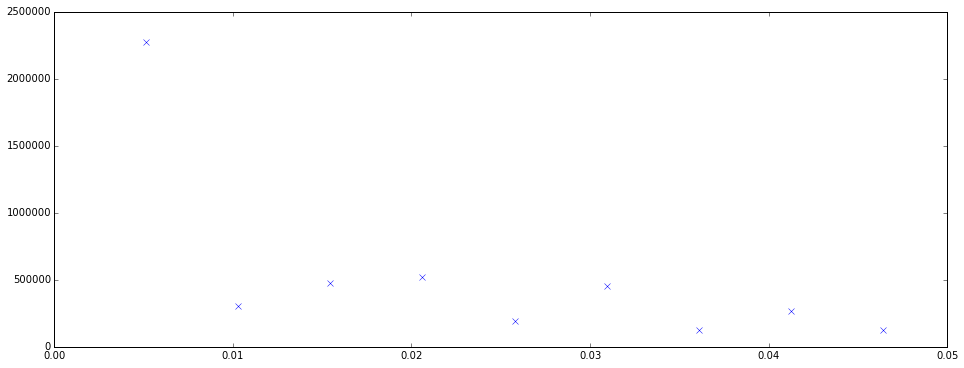

In [10]:
# Plotting the first fourier transform to identify what point lies closest to 1/52 = 0.019.
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
ax.set_xlim(0, 1./20)
plot5 = ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (np.abs(np.fft.rfft(mta_cube_stations[1])))[1:], 'x')

### According to the plot, point #4 lies at the smallest distance away from 0.019 = 1/52. Therefore our task is to identify 4 stations out of 600 that have the biggest values for the 4th points in their Fourier Transformation.

In [23]:
# Plotting all Fourier Transformations together for visuals
#Selecting 4th points from all stations and sorting descending 
fourth = {}
for k in range(0, 599):
    fourth[k] = np.abs(np.fft.rfft(mta_cube_stations[k])[4])

# Sorting descending
fourth = sorted(fourth.items(), key=lambda x: x[1], reverse = True)
print "4 stations that have the biggest annual periodicity: "
print fourth[0:4]

4 stations that have the biggest annual periodicity: 
[(0, 2980160.6355953491), (194, 2950388.929214194), (150, 2931895.8769513387), (327, 2402218.5809588572)]


### Having the indeces starting at 0, 4 stations that show the prominent annual periodicity trend are 1, 195, 151 and 328.